In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import cv2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import stylecloud
from IPython.display import Image

In [2]:
df = pd.read_csv("Anthony Ginting-1000-tweets.csv")
df.head(10)

,Datetime,Tweet ID,Text
0,2021-08-01 13:51:59,1421831077685915648,RT @catchmeupid: TERIMA KASIH GINTING.. \nSamp...
1,2021-08-01 13:51:59,1421831075249082381,RT @justaintnobody: Anthony Sinisuka Ginting i...
2,2021-08-01 13:51:57,1421831066059300865,RT @BadmintonTalk: SEMIFINALS - MS\nAnthony Si...
3,2021-08-01 13:51:50,1421831039589093378,RT @justaintnobody: Anthony Sinisuka Ginting i...
4,2021-08-01 13:51:44,1421831013659942917,RT @catchmeupid: TERIMA KASIH GINTING.. \nSamp...
5,2021-08-01 13:51:38,1421830989827899393,RT @OposisiCerdas: Ade Armando Singgung Agama ...
6,2021-08-01 13:51:38,1421830986216611842,RT @justaintnobody: Anthony Sinisuka Ginting i...
7,2021-08-01 13:51:34,1421830969267347459,RT @justaintnobody: Anthony Sinisuka Ginting i...
8,2021-08-01 13:51:25,1421830935381647364,RT @justaintnobody: Anthony Sinisuka Ginting i...
9,2021-08-01 13:51:24,1421830928897175555,RT @justaintnobody: Anthony Sinisuka Ginting i...


In [3]:
df["Text"][2]

'RT @BadmintonTalk: SEMIFINALS - MS\nAnthony Sinisuka Ginting #INA vs Chen Long #CHN\n\n16-21 11-21 kalah...\n\nTetap semangat Ginting!! Rebut me…'

In [4]:
pattern_mention = "(@[a-z]+).*?"
pattern_rt = ".*?(RT ).*?"
mention, rt = [], []
for text in df["Text"]:
    temp = re.findall(pattern_mention, text, re.IGNORECASE)
    mention.append(temp)
    if re.match(pattern_rt, text):
        rt.append(1)
    else:
        rt.append(0)
df["Mention"] = mention
df["RT"] = rt
df.head(10)

,Datetime,Tweet ID,Text,Mention,RT
0,2021-08-01 13:51:59,1421831077685915648,RT @catchmeupid: TERIMA KASIH GINTING.. \nSamp...,[@catchmeupid],1
1,2021-08-01 13:51:59,1421831075249082381,RT @justaintnobody: Anthony Sinisuka Ginting i...,[@justaintnobody],1
2,2021-08-01 13:51:57,1421831066059300865,RT @BadmintonTalk: SEMIFINALS - MS\nAnthony Si...,[@BadmintonTalk],1
3,2021-08-01 13:51:50,1421831039589093378,RT @justaintnobody: Anthony Sinisuka Ginting i...,[@justaintnobody],1
4,2021-08-01 13:51:44,1421831013659942917,RT @catchmeupid: TERIMA KASIH GINTING.. \nSamp...,[@catchmeupid],1
5,2021-08-01 13:51:38,1421830989827899393,RT @OposisiCerdas: Ade Armando Singgung Agama ...,[@OposisiCerdas],1
6,2021-08-01 13:51:38,1421830986216611842,RT @justaintnobody: Anthony Sinisuka Ginting i...,[@justaintnobody],1
7,2021-08-01 13:51:34,1421830969267347459,RT @justaintnobody: Anthony Sinisuka Ginting i...,[@justaintnobody],1
8,2021-08-01 13:51:25,1421830935381647364,RT @justaintnobody: Anthony Sinisuka Ginting i...,[@justaintnobody],1
9,2021-08-01 13:51:24,1421830928897175555,RT @justaintnobody: Anthony Sinisuka Ginting i...,[@justaintnobody],1


In [5]:
# remove punctuation
clean = []
for text in df["Text"]:
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]
    final = re.sub(".*?(RT ).*?", '', " ".join(words), flags=re.IGNORECASE)
    final = re.sub(" grey | greys | greysia | polii ", ' greyspolii ', final, flags=re.IGNORECASE)
    final = re.sub(" apriyani rahayu | apri | rahayu ", ' apriyani ', final, flags=re.IGNORECASE)
    final = re.sub(" greyspoliiapriyani ", ' greyspolii apriyani ', final, flags=re.IGNORECASE)
    final = re.sub("badmintontalk", '', final, flags=re.IGNORECASE)
    clean.append(final)
df["Text_clean"] = clean
df.head(10)

,Datetime,Tweet ID,Text,Mention,RT,Text_clean
0,2021-08-01 13:51:59,1421831077685915648,RT @catchmeupid: TERIMA KASIH GINTING.. \nSamp...,[@catchmeupid],1,catchmeupid TERIMA KASIH Sampai di semifinal p...
1,2021-08-01 13:51:59,1421831075249082381,RT @justaintnobody: Anthony Sinisuka Ginting i...,[@justaintnobody],1,justaintnobody Anthony Sinisuka Ginting is the...
2,2021-08-01 13:51:57,1421831066059300865,RT @BadmintonTalk: SEMIFINALS - MS\nAnthony Si...,[@BadmintonTalk],1,SEMIFINALS MS Anthony Sinisuka Ginting INA vs...
3,2021-08-01 13:51:50,1421831039589093378,RT @justaintnobody: Anthony Sinisuka Ginting i...,[@justaintnobody],1,justaintnobody Anthony Sinisuka Ginting is the...
4,2021-08-01 13:51:44,1421831013659942917,RT @catchmeupid: TERIMA KASIH GINTING.. \nSamp...,[@catchmeupid],1,catchmeupid TERIMA KASIH Sampai di semifinal p...
5,2021-08-01 13:51:38,1421830989827899393,RT @OposisiCerdas: Ade Armando Singgung Agama ...,[@OposisiCerdas],1,OposisiCerdas Ade Armando Singgung Agama Antho...
6,2021-08-01 13:51:38,1421830986216611842,RT @justaintnobody: Anthony Sinisuka Ginting i...,[@justaintnobody],1,justaintnobody Anthony Sinisuka Ginting is the...
7,2021-08-01 13:51:34,1421830969267347459,RT @justaintnobody: Anthony Sinisuka Ginting i...,[@justaintnobody],1,justaintnobody Anthony Sinisuka Ginting is the...
8,2021-08-01 13:51:25,1421830935381647364,RT @justaintnobody: Anthony Sinisuka Ginting i...,[@justaintnobody],1,justaintnobody Anthony Sinisuka Ginting is the...
9,2021-08-01 13:51:24,1421830928897175555,RT @justaintnobody: Anthony Sinisuka Ginting i...,[@justaintnobody],1,justaintnobody Anthony Sinisuka Ginting is the...


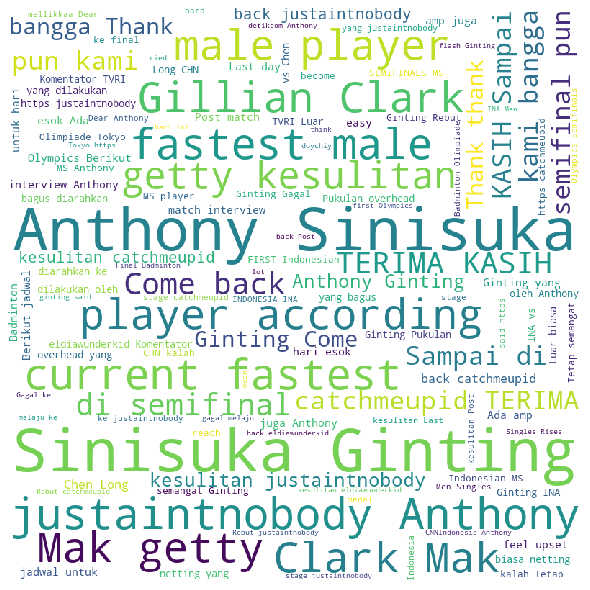

In [6]:
# generate wordcloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ".join(clean))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

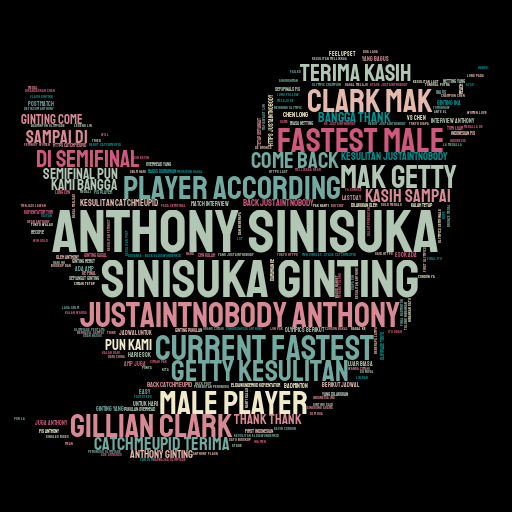

In [7]:
name = "GreyAp-union-rose.png"
stylecloud.gen_stylecloud(text=" ".join(clean).lower(), output_name=name,icon_name= "fab fa-twitter", palette="cartocolors.diverging.TealRose_7", background_color="black")
Image(filename=name)

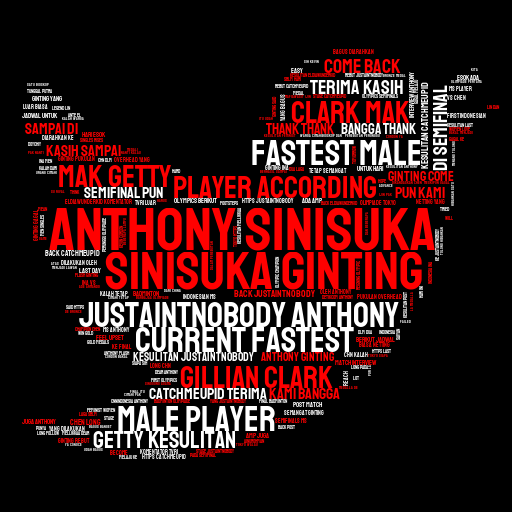

In [8]:
name = "GreyAp-ID.png"
stylecloud.gen_stylecloud(text=" ".join(clean).lower(), output_name=name,icon_name= "fab fa-twitter", colors=["red", "white"], background_color="black")
Image(filename=name) 

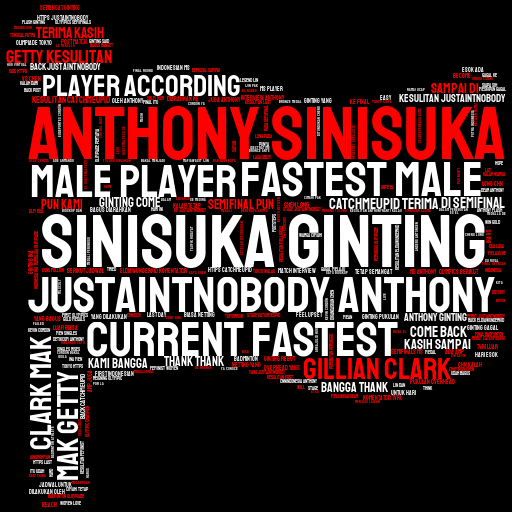

In [9]:
name = "GreyAp-union-IDflag.png"
stylecloud.gen_stylecloud(text=" ".join(clean).lower(), output_name=name,icon_name= "fas fa-flag", colors=["red", "white"], background_color="black")
Image(filename=name) 

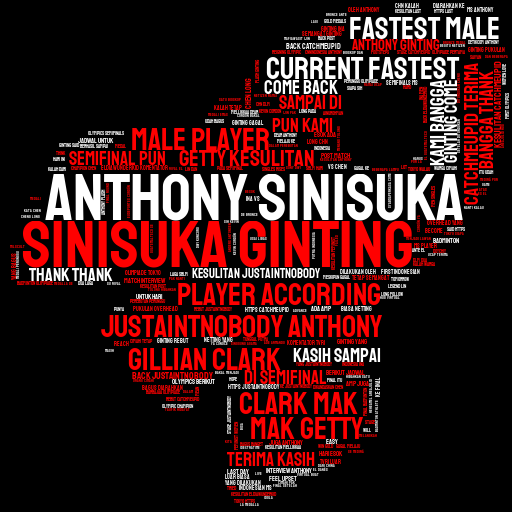

In [10]:
name = "GreyAp-ID-rocket.png"
stylecloud.gen_stylecloud(text=" ".join(clean).lower(), output_name=name,icon_name= "fas fa-rocket", colors=["red", "white"], background_color="black")
Image(filename=name) 